Let's see, how clever and fast you are in coding

In [1]:
#Initial imports
from __plt__ import *
from __reader__ import *

In [2]:
#Merging databases
source_path = r'E:/LICENSE/ProgsData/main/GAMAforOleg.txt'
input_path = r'E:/backup/backup_BPT/GAMA_ETG_OLA.csv'
output_path = r'E:/databases/Merged.csv'

bids_age = [[8.8, 9.0], [9.0, 9.2], [9.2, 9.4], [9.4, 9.6], [9.6, 9.8], [9.8, 10.0]]
bids_mass = [[10.0, 10.25], [10.25, 10.5], [10.5, 10.75], [10.75, 11], [11, 11.25], [11.25, 11.5]]
bids_z = [[0.0, 0.05], [0.05, 0.1], [0.1, 0.15], [0.15, 0.2], [0.2, 0.25], [0.25, 0.34]]
merge_phys_databases(source_path, input_path, output_path)

(1995, 1081)


c:\Python\Python310\lib\site-packages\scipy\stats\_resampling.py:144: RuntimeWarning: invalid value encountered in scalar divide
  a_hat = 1/6 * sum(nums) / sum(dens)**(3/2)
c:\Python\Python310\lib\site-packages\scipy\stats\_resampling.py:97: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  warnings.warn(DegenerateDataWarning(msg))


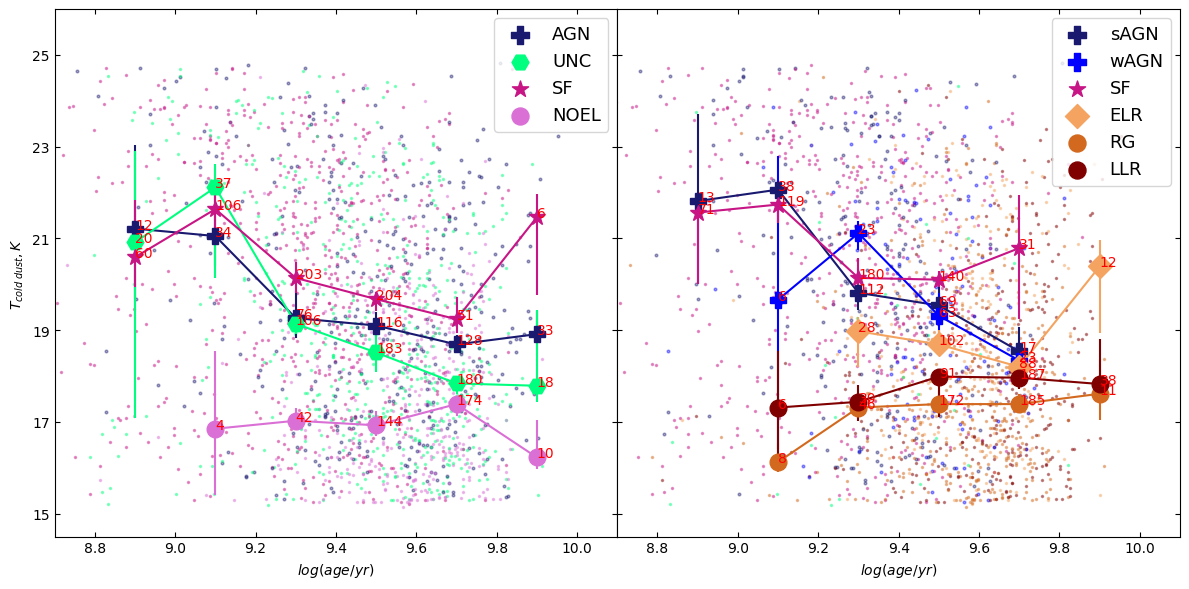

In [3]:
plotting({
    'input_path' : output_path,
    'x' : 'ager_percentile50',
    'y' : 'T_C_ISM_percentile50',
    'up' : 'T_C_ISM_percentile84',
    'down' : 'T_C_ISM_percentile16',
    'xlim' : [8.7, 10.1],
    'ylim' : [14.5, 26],
    'xticks' : np.arange(8.8, 10.1, 0.2),
    'yticks' : np.arange(15, 25.9, 2),
    'xlabel' : r'$log(age/yr)$',
    'ylabel' : r'$T_{cold \; dust}, K$',
    'bids': bids_age,
    'save_path' : r'./FIGURES/TDC_new.pdf'
})

c:\Python\Python310\lib\site-packages\scipy\stats\_resampling.py:144: RuntimeWarning: invalid value encountered in scalar divide
  a_hat = 1/6 * sum(nums) / sum(dens)**(3/2)
c:\Python\Python310\lib\site-packages\scipy\stats\_resampling.py:97: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  warnings.warn(DegenerateDataWarning(msg))


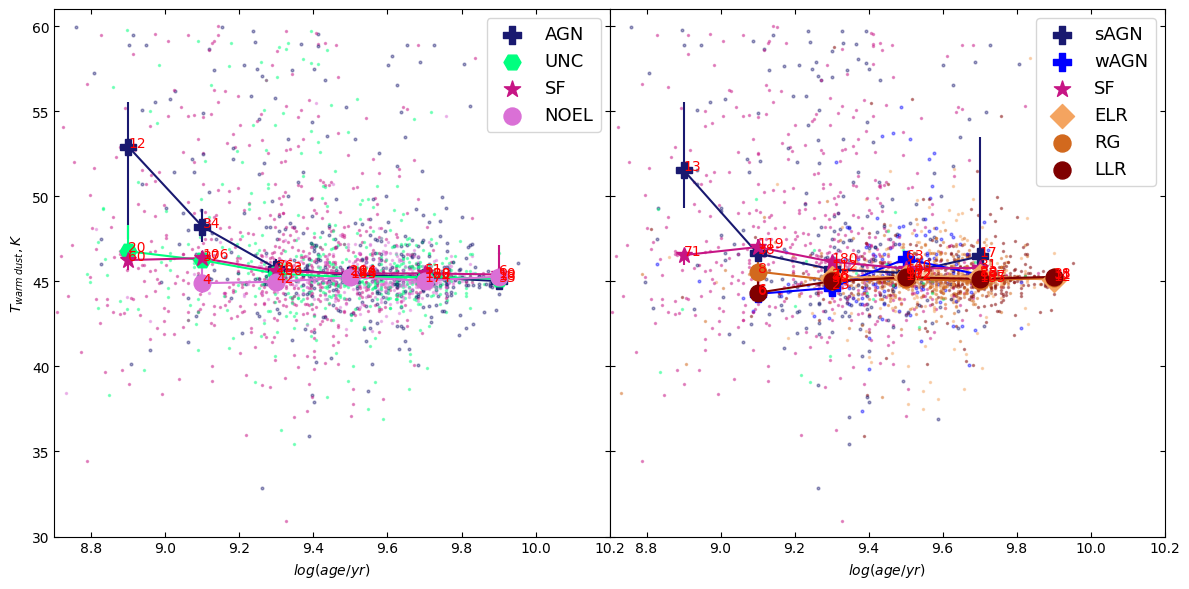

In [4]:
plotting({
    'input_path' : output_path,
    'x' : 'ager_percentile50',
    'y' : 'T_W_BC_percentile50',
    'up' : 'T_W_BC_percentile84',
    'down' : 'T_W_BC_percentile16',
    'xlim' : [8.7, 10.1],
    'ylim' : [30, 61],
    'xticks' : np.arange(8.8, 10.1, 0.2),
    'yticks' : np.arange(30, 61, 5),
    'xlabel' : r'$log(age/yr)$',
    'ylabel' : r'$T_{warm \; dust}, K$',
    'bids': bids_age,
    'save_path' : r'./FIGURES/TDW_new.pdf'
})

c:\Python\Python310\lib\site-packages\scipy\stats\_resampling.py:144: RuntimeWarning: invalid value encountered in scalar divide
  a_hat = 1/6 * sum(nums) / sum(dens)**(3/2)
c:\Python\Python310\lib\site-packages\scipy\stats\_resampling.py:97: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  warnings.warn(DegenerateDataWarning(msg))


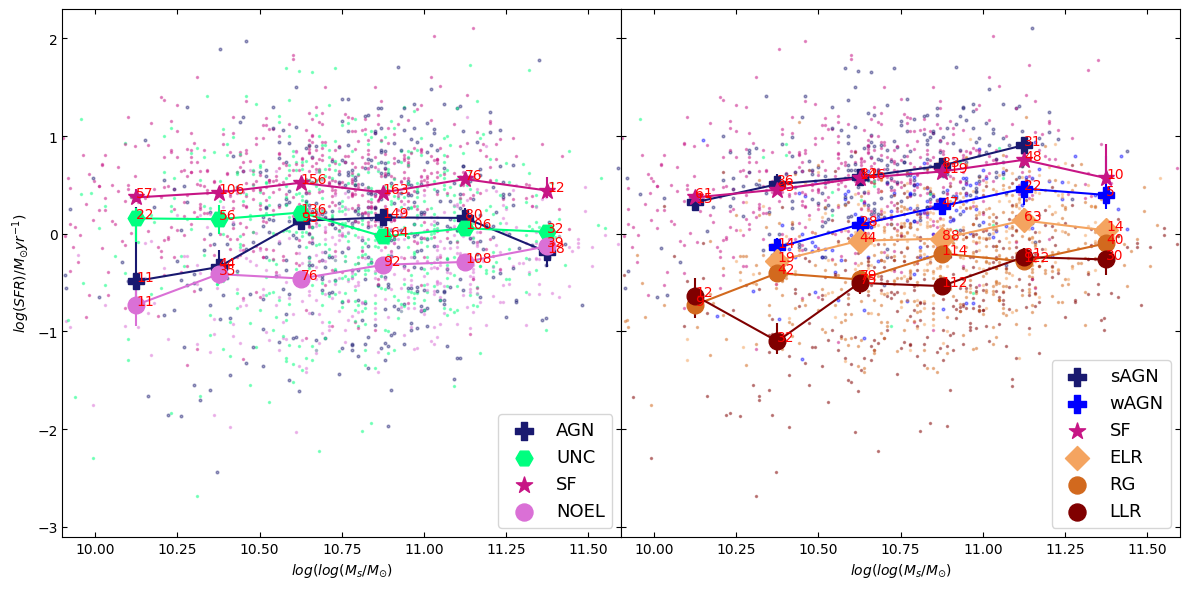

In [6]:
plotting({
    'input_path' : output_path,
    'x' : 'mass_stellar_percentile50',
    'y' : 'SFR_0_1Gyr_percentile50',
    'up' : 'SFR_0_1Gyr_percentile84',
    'down' : 'SFR_0_1Gyr_percentile16',
    'xlim' : [9.9, 11.6],
    'ylim' : [-3.1, 2.3],
    'xticks' : np.arange(10.0, 11.6, 0.25),
    'yticks' : np.arange(-3, 2.2, 1),
    'xlabel' : r'$log(M_s / M_{\odot})$',
    'ylabel' : r'$log(SFR) / M_{\odot} yr^{-1})$',
    'bids': bids_mass,
    'save_path' : r'./FIGURES/SFRSM_new.pdf'
})

c:\Python\Python310\lib\site-packages\scipy\stats\_resampling.py:144: RuntimeWarning: invalid value encountered in scalar divide
  a_hat = 1/6 * sum(nums) / sum(dens)**(3/2)
c:\Python\Python310\lib\site-packages\scipy\stats\_resampling.py:97: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  warnings.warn(DegenerateDataWarning(msg))


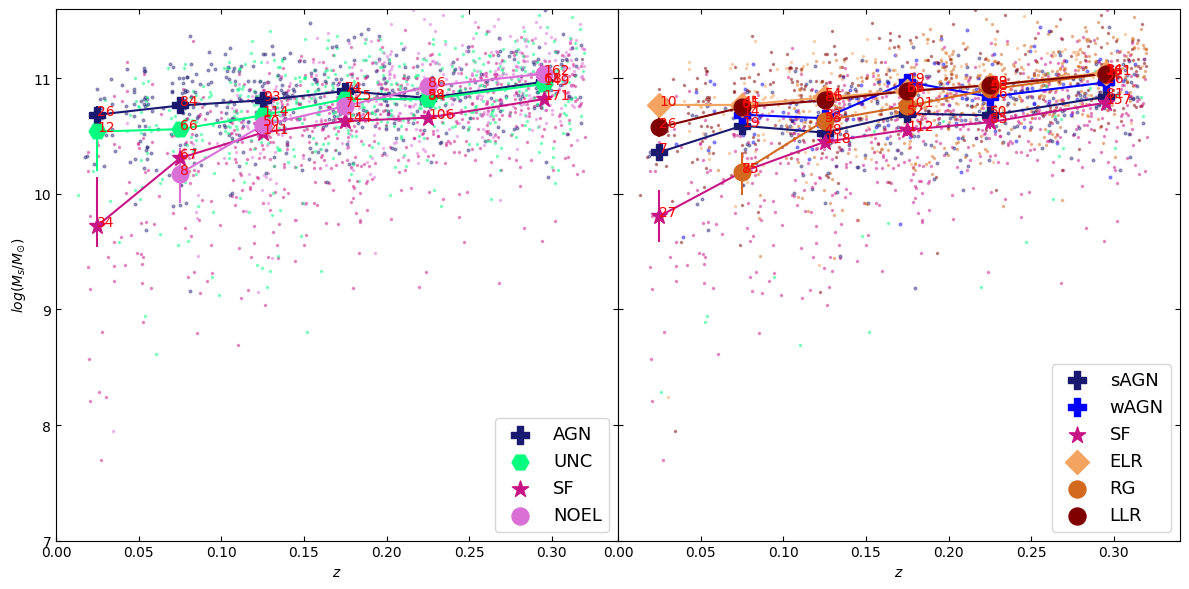

In [8]:
plotting({
    'input_path' : output_path,
    'x' : 'Z_1',
    'y' : 'mass_stellar_percentile50',
    'up' : 'mass_stellar_percentile84',
    'down' : 'mass_stellar_percentile16',
    'xlim' : [0.0, 0.34],
    'ylim' : [7, 11.6],
    'xticks' : np.arange(0.0, 0.34, 0.05),
    'yticks' : np.arange(7, 11.1, 1),
    'xlabel' : r'$z$',
    'ylabel' : r'$log(M_s / M_{\odot})$',
    'bids': bids_z,
    'save_path' : r'./FIGURES/MS_z.pdf'
})

c:\Python\Python310\lib\site-packages\scipy\stats\_resampling.py:144: RuntimeWarning: invalid value encountered in scalar divide
  a_hat = 1/6 * sum(nums) / sum(dens)**(3/2)
c:\Python\Python310\lib\site-packages\scipy\stats\_resampling.py:97: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  warnings.warn(DegenerateDataWarning(msg))


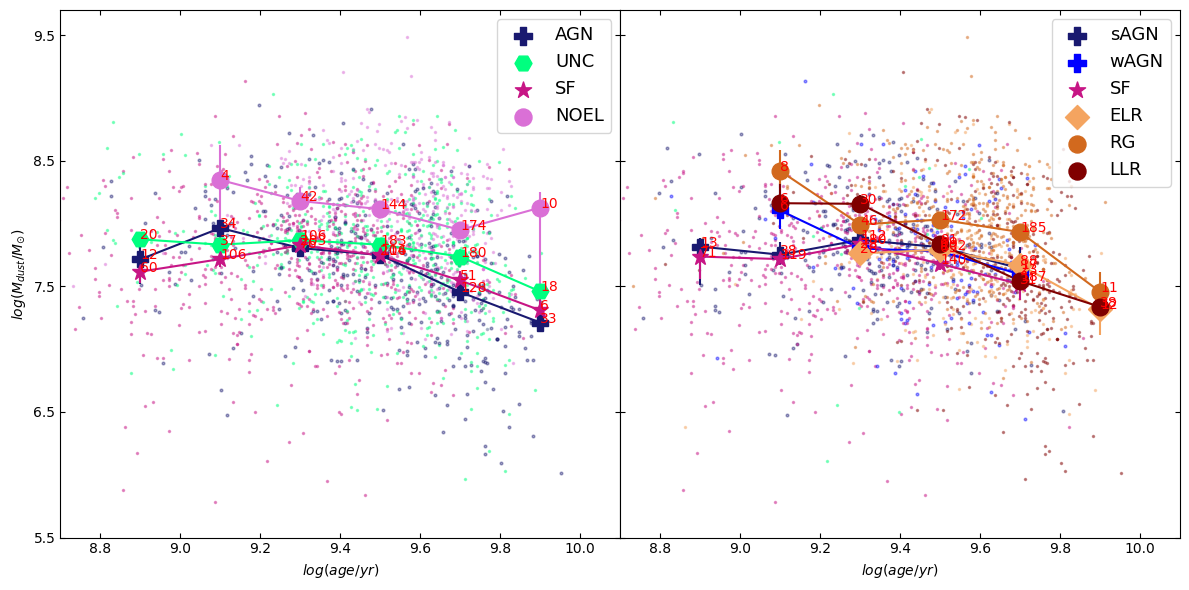

In [11]:
plotting({
    'input_path' : output_path,
    'x' : 'ager_percentile50',
    'y' : 'mass_dust_percentile50',
    'up' : 'mass_dust_percentile84',
    'down' : 'mass_dust_percentile16',
    'xlim' : [8.7, 10.1],
    'ylim' : [5.5, 9.7],
    'xticks' : np.arange(8.8, 10.1, 0.2),
    'yticks' : np.arange(5.5, 9.7, 1),
    'xlabel' : r'$log(age/yr)$',
    'ylabel' : r'$log(M_{dust}/M_{\odot})$',
    'bids': bids_age,
    'save_path' : r'./FIGURES/MD_age_new.pdf'
})